In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [ ]:
df = pd.read_csv("adani.csv")
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,18-06-2018,BE,30.00,31.50,28.50,151.45,31.50,31.50,30.09,31.50,28.5,7006229,2.108440e+08,5272
1,19-06-2018,BE,32.70,33.05,31.00,31.50,33.05,32.60,32.55,33.05,28.5,2895692,9.426390e+07,4070
2,20-06-2018,BE,31.50,32.20,31.00,32.60,31.00,31.00,31.04,33.05,28.5,1115553,3.462806e+07,2897
3,21-06-2018,BE,29.45,30.00,29.45,31.00,29.45,29.65,29.61,33.05,28.5,2854524,8.452398e+07,2941
4,22-06-2018,BE,28.20,29.80,28.20,29.65,29.80,29.45,28.94,33.05,28.2,1612972,4.668530e+07,2846


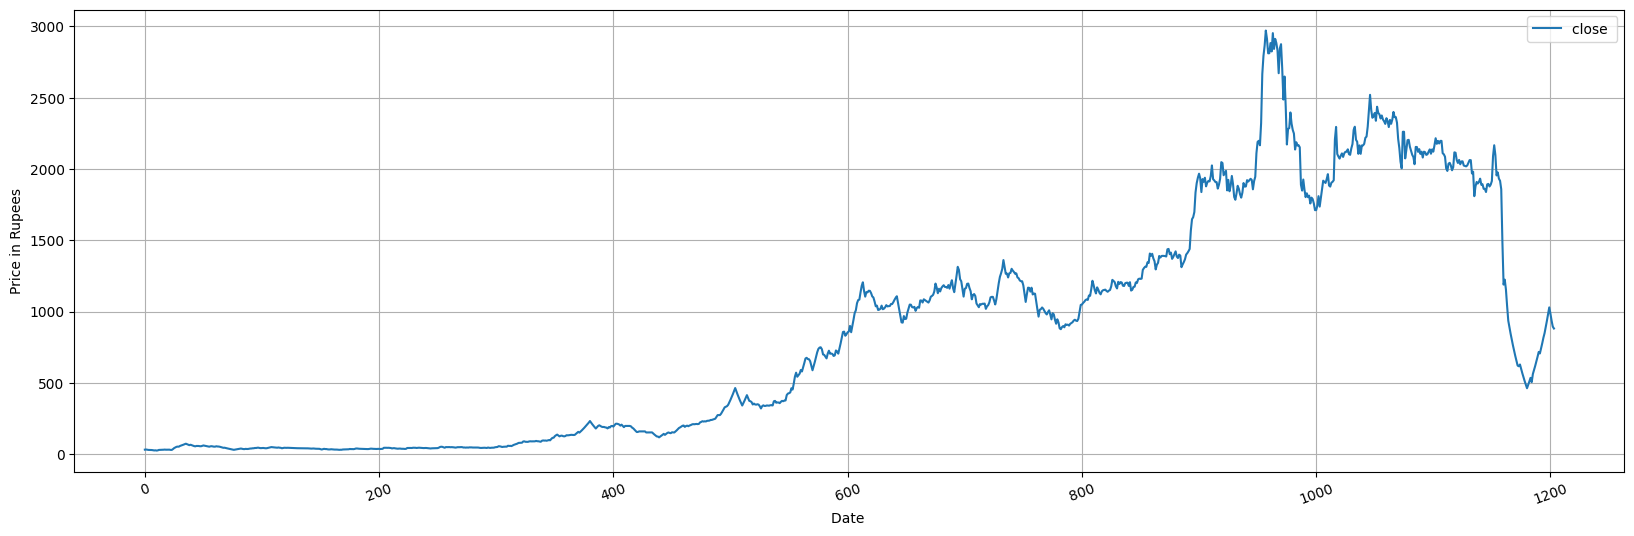

In [ ]:
df['Date ']=df.index
%matplotlib inline
df.plot(x='Date ', y='close ', kind='line', figsize=(20,6), rot=20)
plt.grid()
plt.ylabel("Price in Rupees")
plt.show()




In [ ]:
# 25 days simple moving average column
df['25_SMA'] = df['close '].rolling(window = 25, min_periods = 1).mean()
#75 days simple moving average column
df['75_SMA'] = df['close '].rolling(window = 75, min_periods = 1).mean()
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,25_SMA,75_SMA
0,0,BE,30.00,31.50,28.50,151.45,31.50,31.50,30.09,31.50,28.5,7006229,2.108440e+08,5272,31.5000,31.5000
1,1,BE,32.70,33.05,31.00,31.50,33.05,32.60,32.55,33.05,28.5,2895692,9.426390e+07,4070,32.0500,32.0500
2,2,BE,31.50,32.20,31.00,32.60,31.00,31.00,31.04,33.05,28.5,1115553,3.462806e+07,2897,31.7000,31.7000
3,3,BE,29.45,30.00,29.45,31.00,29.45,29.65,29.61,33.05,28.5,2854524,8.452398e+07,2941,31.1875,31.1875
4,4,BE,28.20,29.80,28.20,29.65,29.80,29.45,28.94,33.05,28.2,1612972,4.668530e+07,2846,30.8400,30.8400


In [ ]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['25_SMA'] > df['75_SMA'], 1.0, 0.0)

In [ ]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,25_SMA,75_SMA,Signal,Position
0,0,BE,30.00,31.50,28.50,151.45,31.50,31.50,30.09,31.50,28.5,7006229,2.108440e+08,5272,31.5000,31.5000,0.0,NaN
1,1,BE,32.70,33.05,31.00,31.50,33.05,32.60,32.55,33.05,28.5,2895692,9.426390e+07,4070,32.0500,32.0500,0.0,0.0
2,2,BE,31.50,32.20,31.00,32.60,31.00,31.00,31.04,33.05,28.5,1115553,3.462806e+07,2897,31.7000,31.7000,0.0,0.0
3,3,BE,29.45,30.00,29.45,31.00,29.45,29.65,29.61,33.05,28.5,2854524,8.452398e+07,2941,31.1875,31.1875,0.0,0.0
4,4,BE,28.20,29.80,28.20,29.65,29.80,29.45,28.94,33.05,28.2,1612972,4.668530e+07,2846,30.8400,30.8400,0.0,0.0


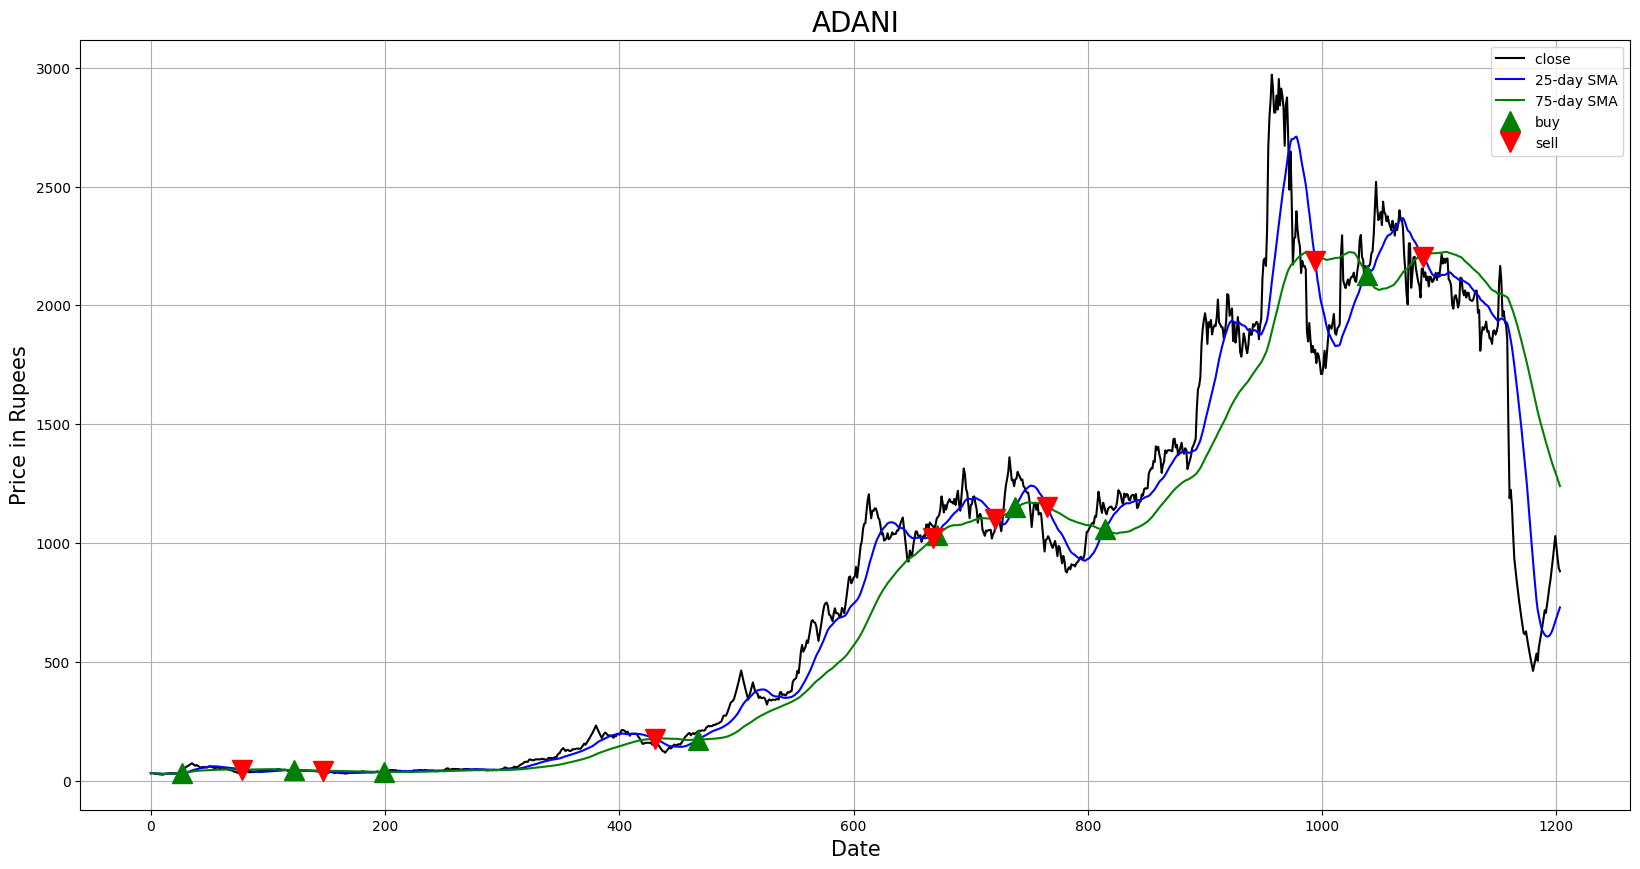

In [ ]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['close '].plot(color = 'k', label= 'close ') 
df['25_SMA'].plot(color = 'b',label = '25-day SMA') 
df['75_SMA'].plot(color = 'g', label = '75-day SMA')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['25_SMA'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['25_SMA'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ADANI', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 25 days exponential moving average column
df['25_EMA'] = df['close '].ewm(span = 25, adjust = False).mean()
#75 days exponential moving average column
df['75_EMA'] = df['close '].ewm(span = 75, adjust = False).mean()



In [ ]:
 #cnew column 'Signal' such that if 25-day EMA is greater than 75-day EMA then set Signal as 1 else 0
  
df['Signal'] = 0.0  
df['Signal'] = np.where(df['25_EMA'] > df['75_EMA'], 1.0, 0.0)



In [ ]:
#+ a new column 'Position' which is a day-to-day difference of the 'Signal' column
df['Position'] = df['Signal'].diff()
plt.figure(figsize = (20,10))


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

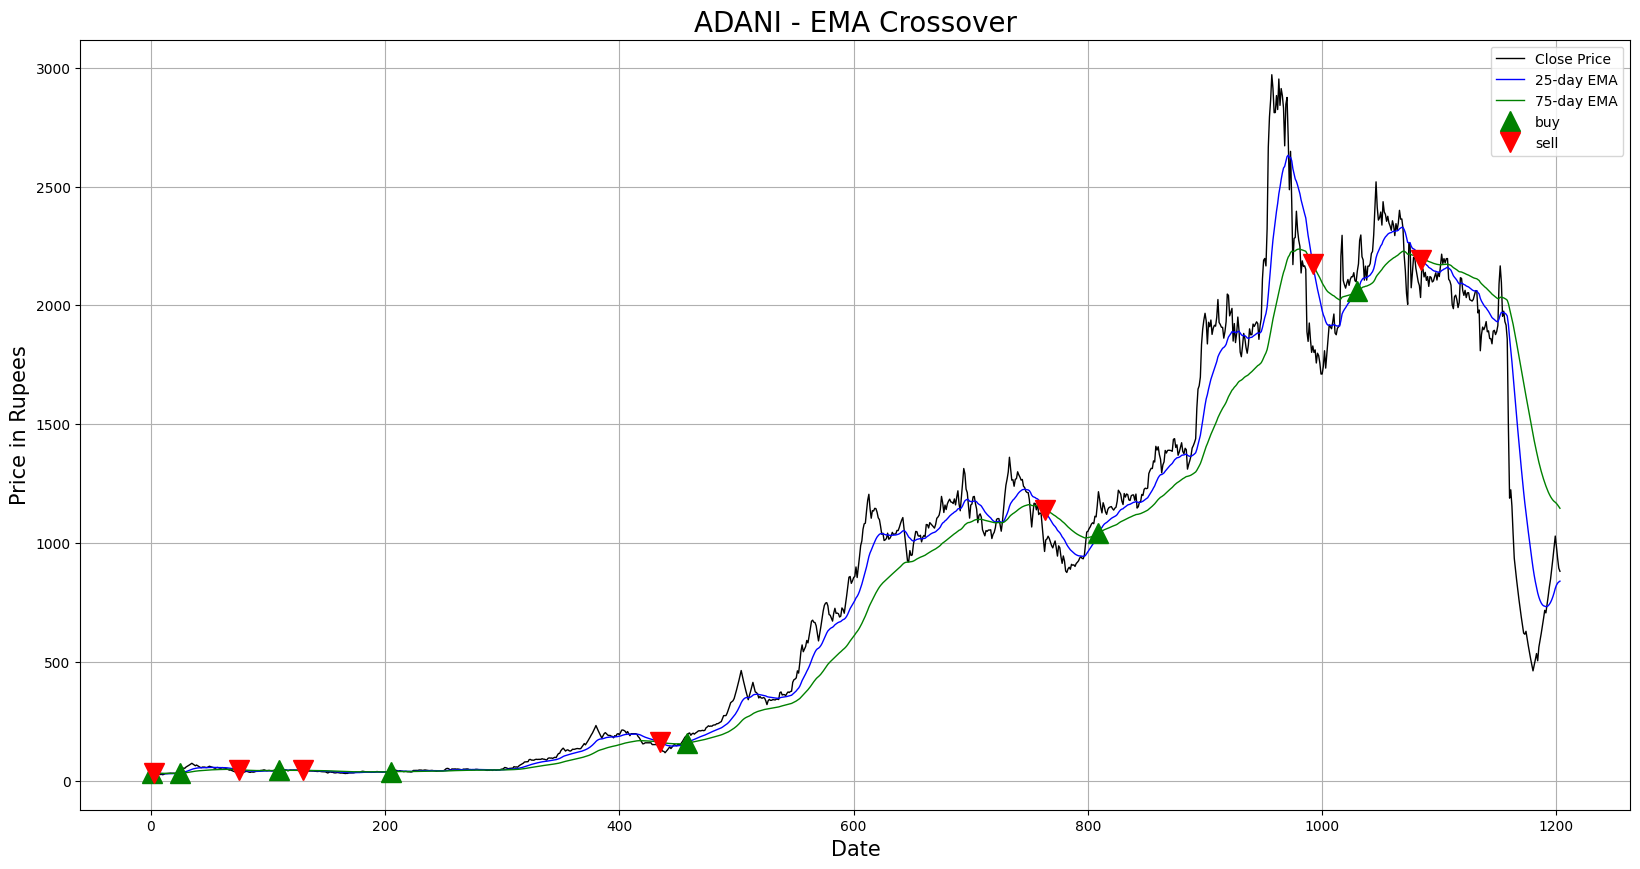

In [ ]:

plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['close '].plot(color = 'k', lw = 1, label = 'Close Price')  
df['25_EMA'].plot(color = 'b', lw = 1, label = '25-day EMA') 
df['75_EMA'].plot(color = 'g', lw = 1, label = '75-day EMA')
# plot ‘buy’ and 'sell' signals
plt.plot(df[df['Position'] == 1].index, 
         df['25_EMA'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df[df['Position'] == -1].index, 
         df['25_EMA'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ADANI - EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()